In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from pycaret import nlp
from pycaret import classification
mpl.rcParams['figure.dpi'] = 300


In [28]:
data = pd.read_csv('sms.csv', encoding = "ISO-8859-1")

data.head(10)

,S. No.,Message_body,Label
0,1,Rofl. Its true to its name,Non-Spam
1,2,The guy did some bitching but I acted like i'd...,Non-Spam
2,3,"Pity, * was in mood for that. So...any other s...",Non-Spam
3,4,Will ü b going to esplanade fr home?,Non-Spam
4,5,This is the 2nd time we have tried 2 contact u...,Spam
5,6,REMINDER FROM O2: To get 2.50 pounds free call...,Spam
6,7,Huh y lei...,Non-Spam
7,8,Why don't you wait 'til at least wednesday to ...,Non-Spam
8,9,Ard 6 like dat lor.,Non-Spam
9,10,Ok lor... Sony ericsson salesman... I ask shuh...,Non-Spam


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S. No.        957 non-null    int64 
 1   Message_body  957 non-null    object
 2   Label         957 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.6+ KB


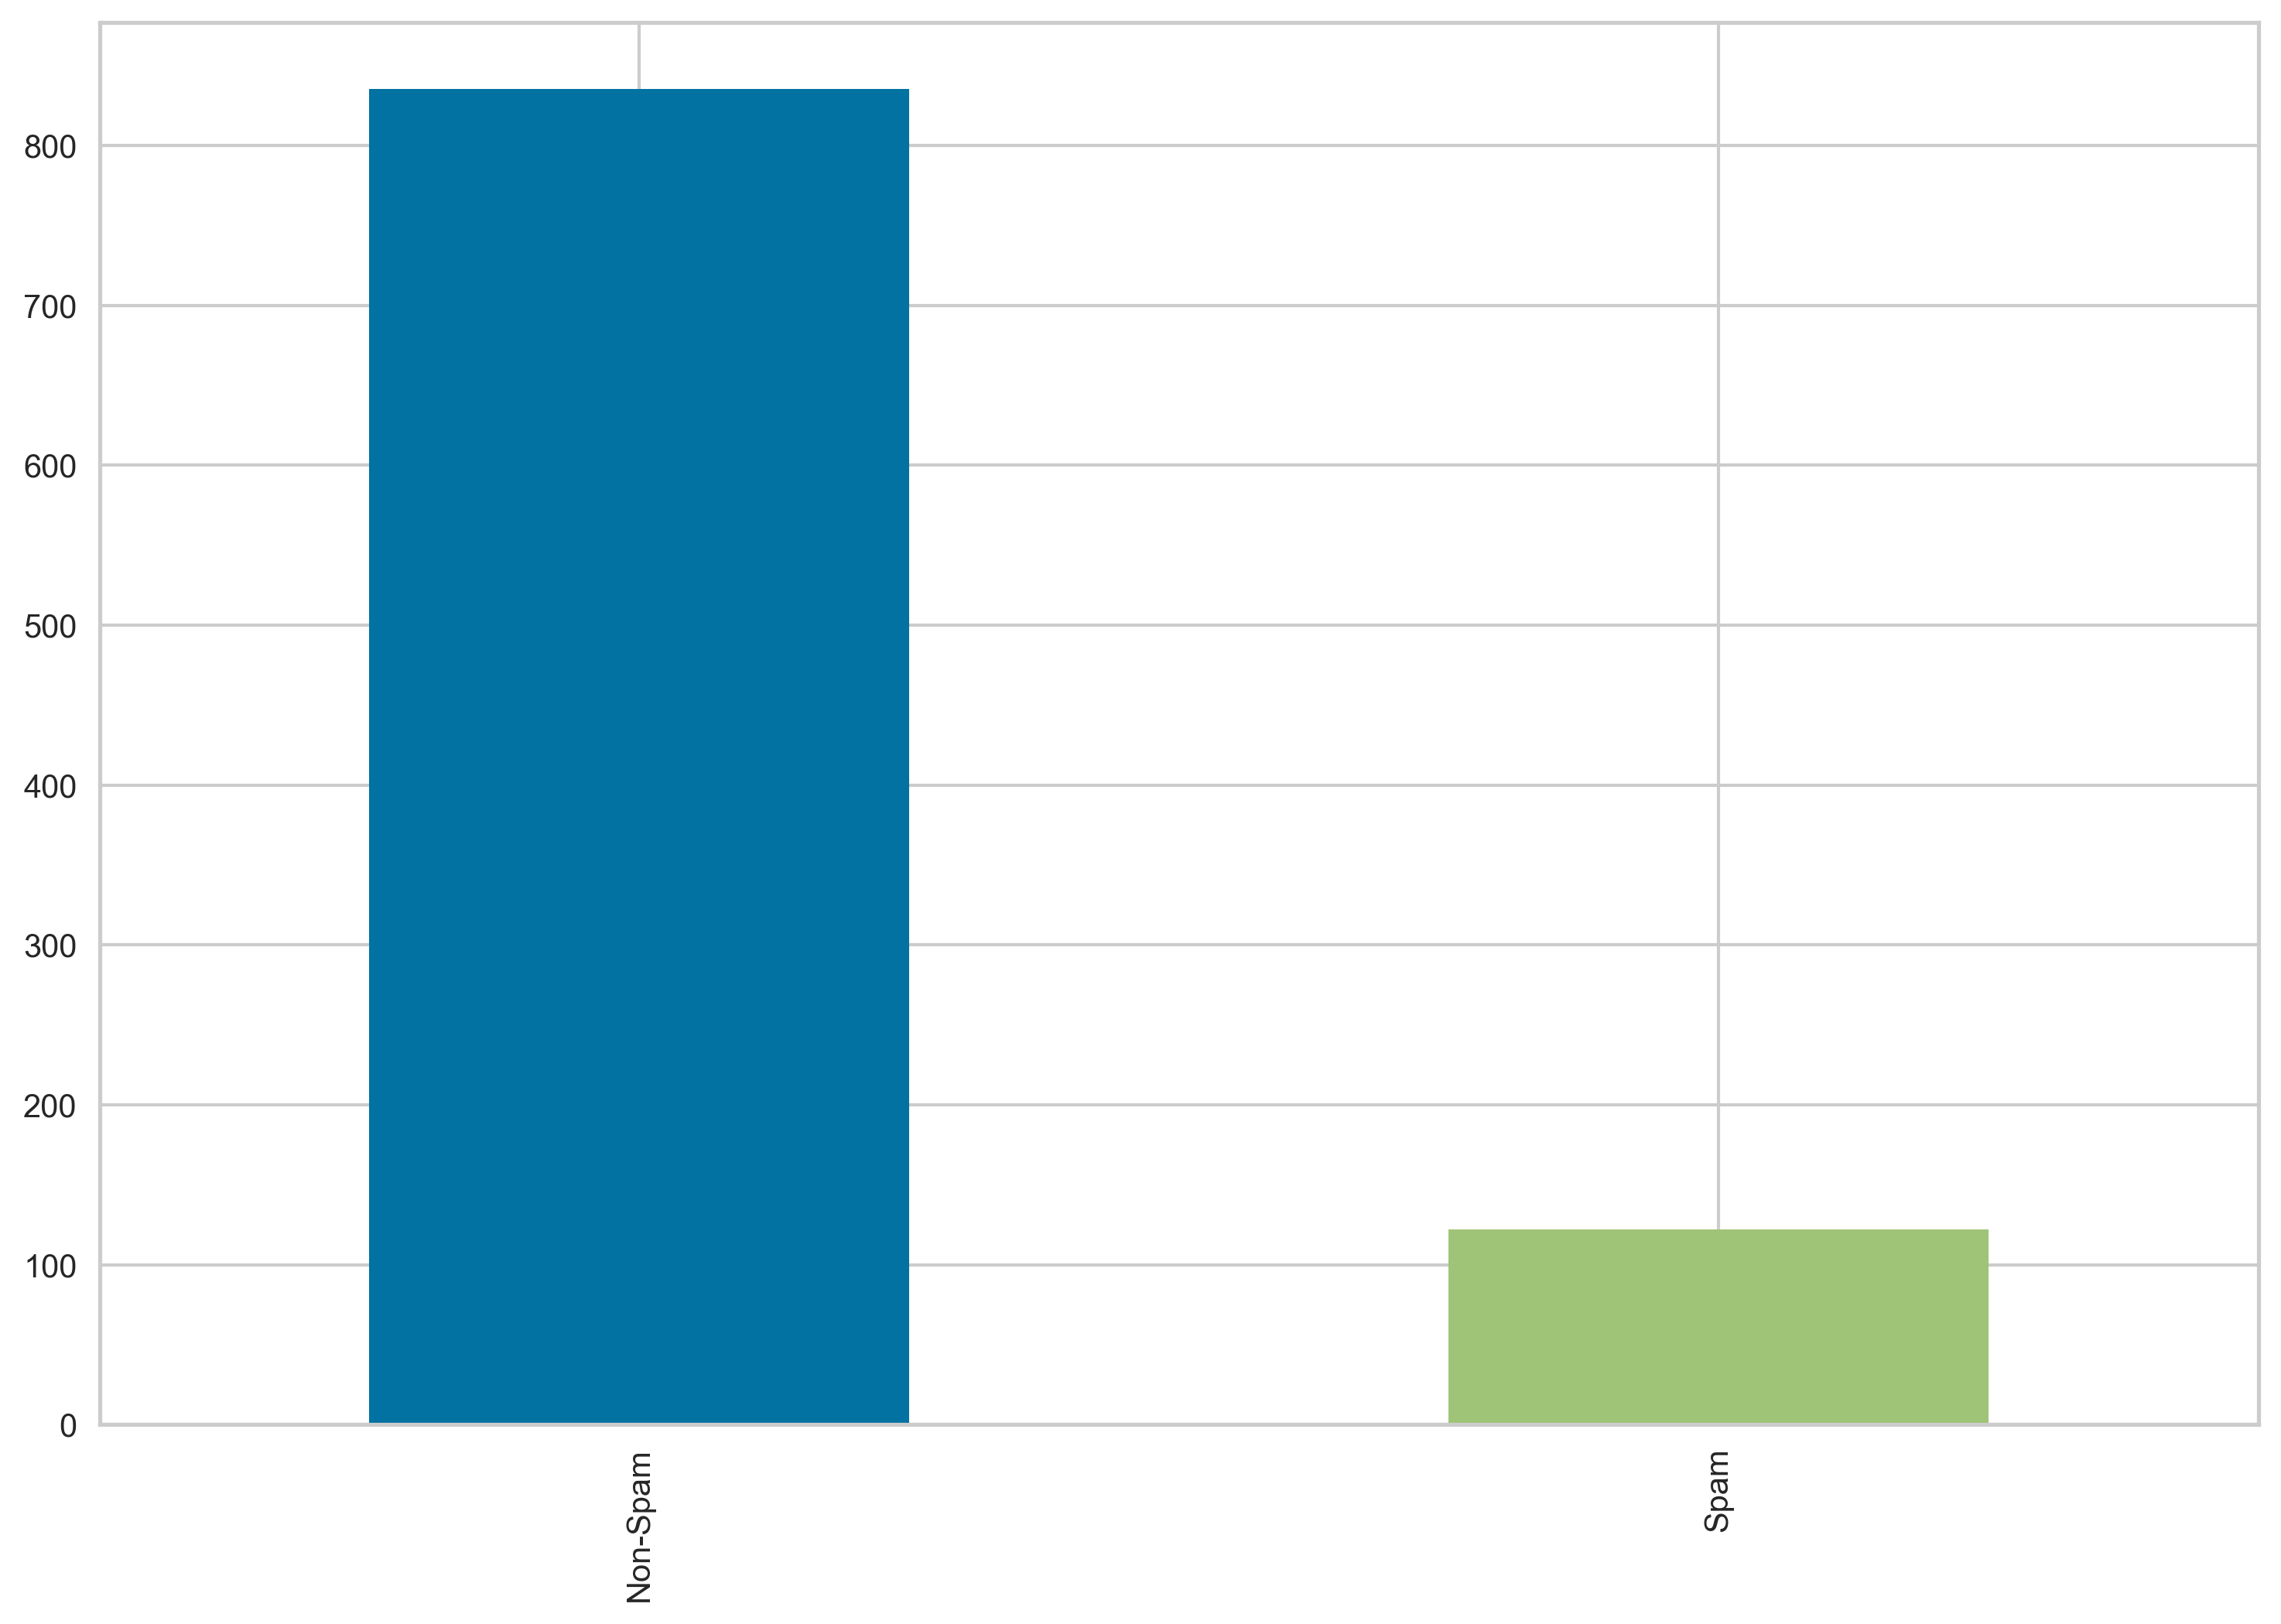

In [30]:
color = ['C0', 'C1']

categories = data['Label'].value_counts()
categories.plot(kind = 'bar', figsize = (12,8), color = color)

plt.show()

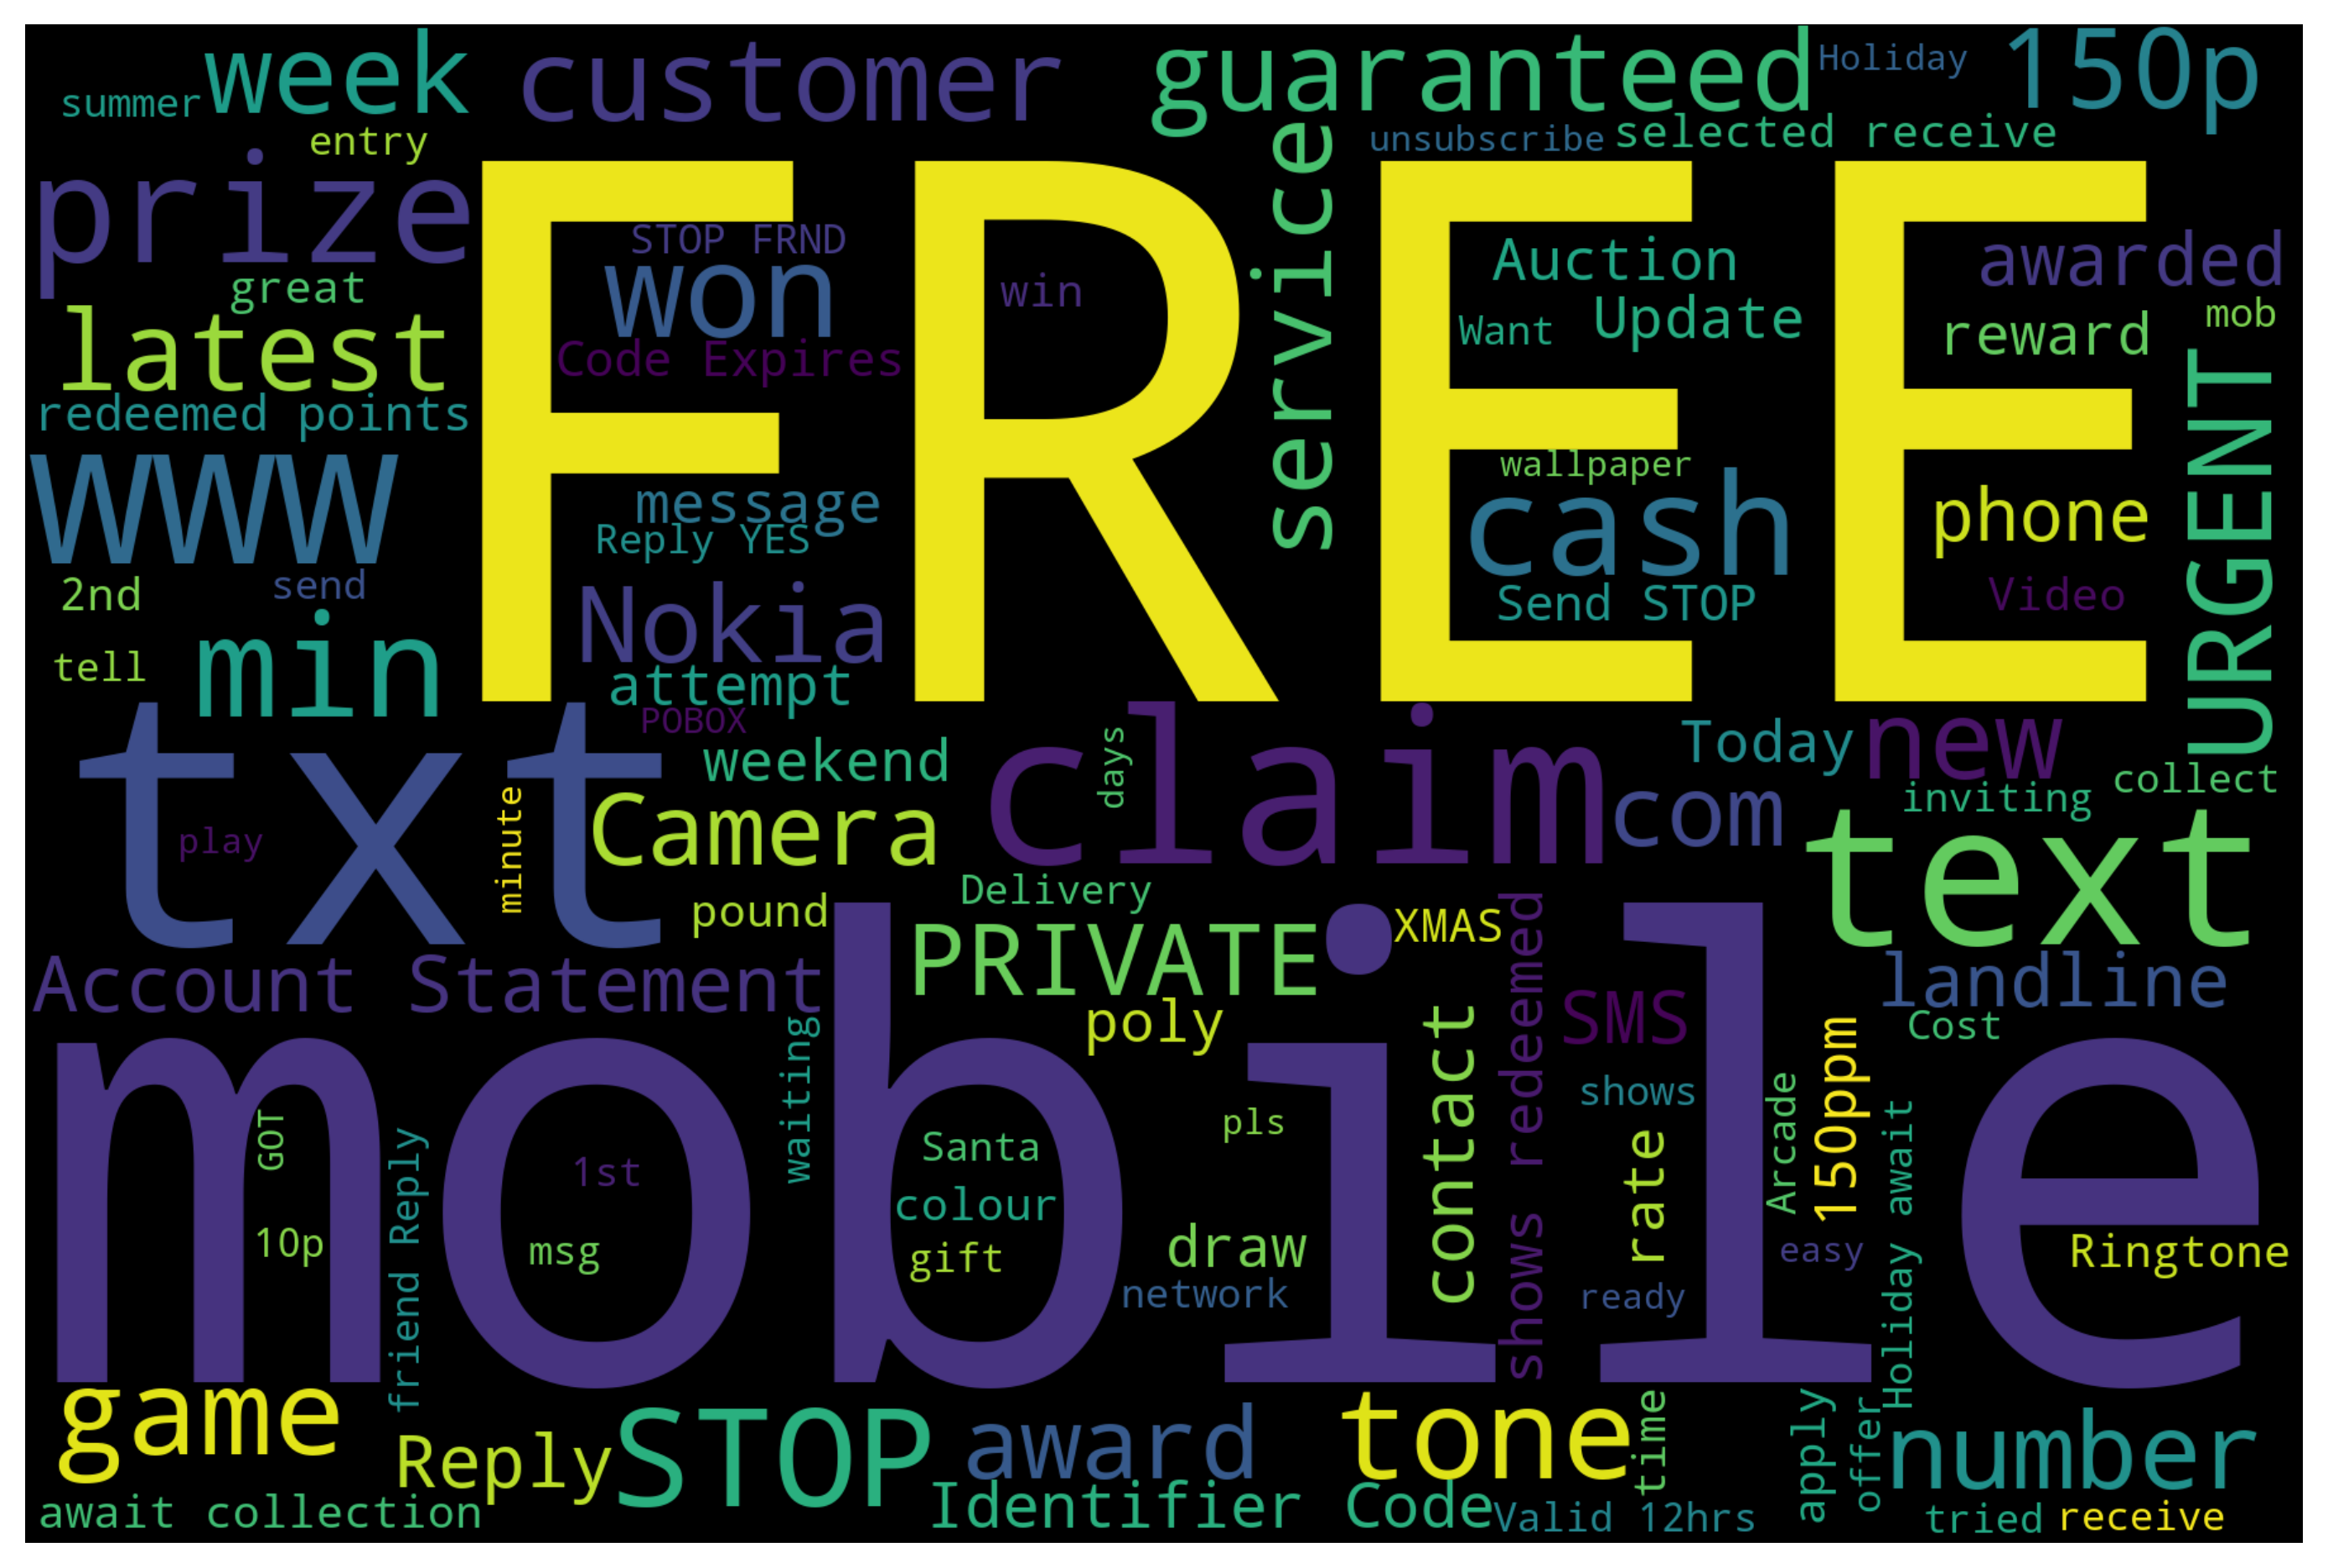

In [31]:
wc = WordCloud(width = 1800, height = 1200, stopwords = STOP_WORDS,
     background_color = 'black', min_word_length = 3, max_words = 100)

data_spam = data.query(" Label == 'Spam' ")['Message_body']
text_spam = ' '.join(data_spam.to_list())
wc_img = wc.generate(text_spam)

plt.figure(figsize = (12,8))
plt.imshow(wc_img, interpolation = 'bilinear')
plt.axis("off")
plt.show()

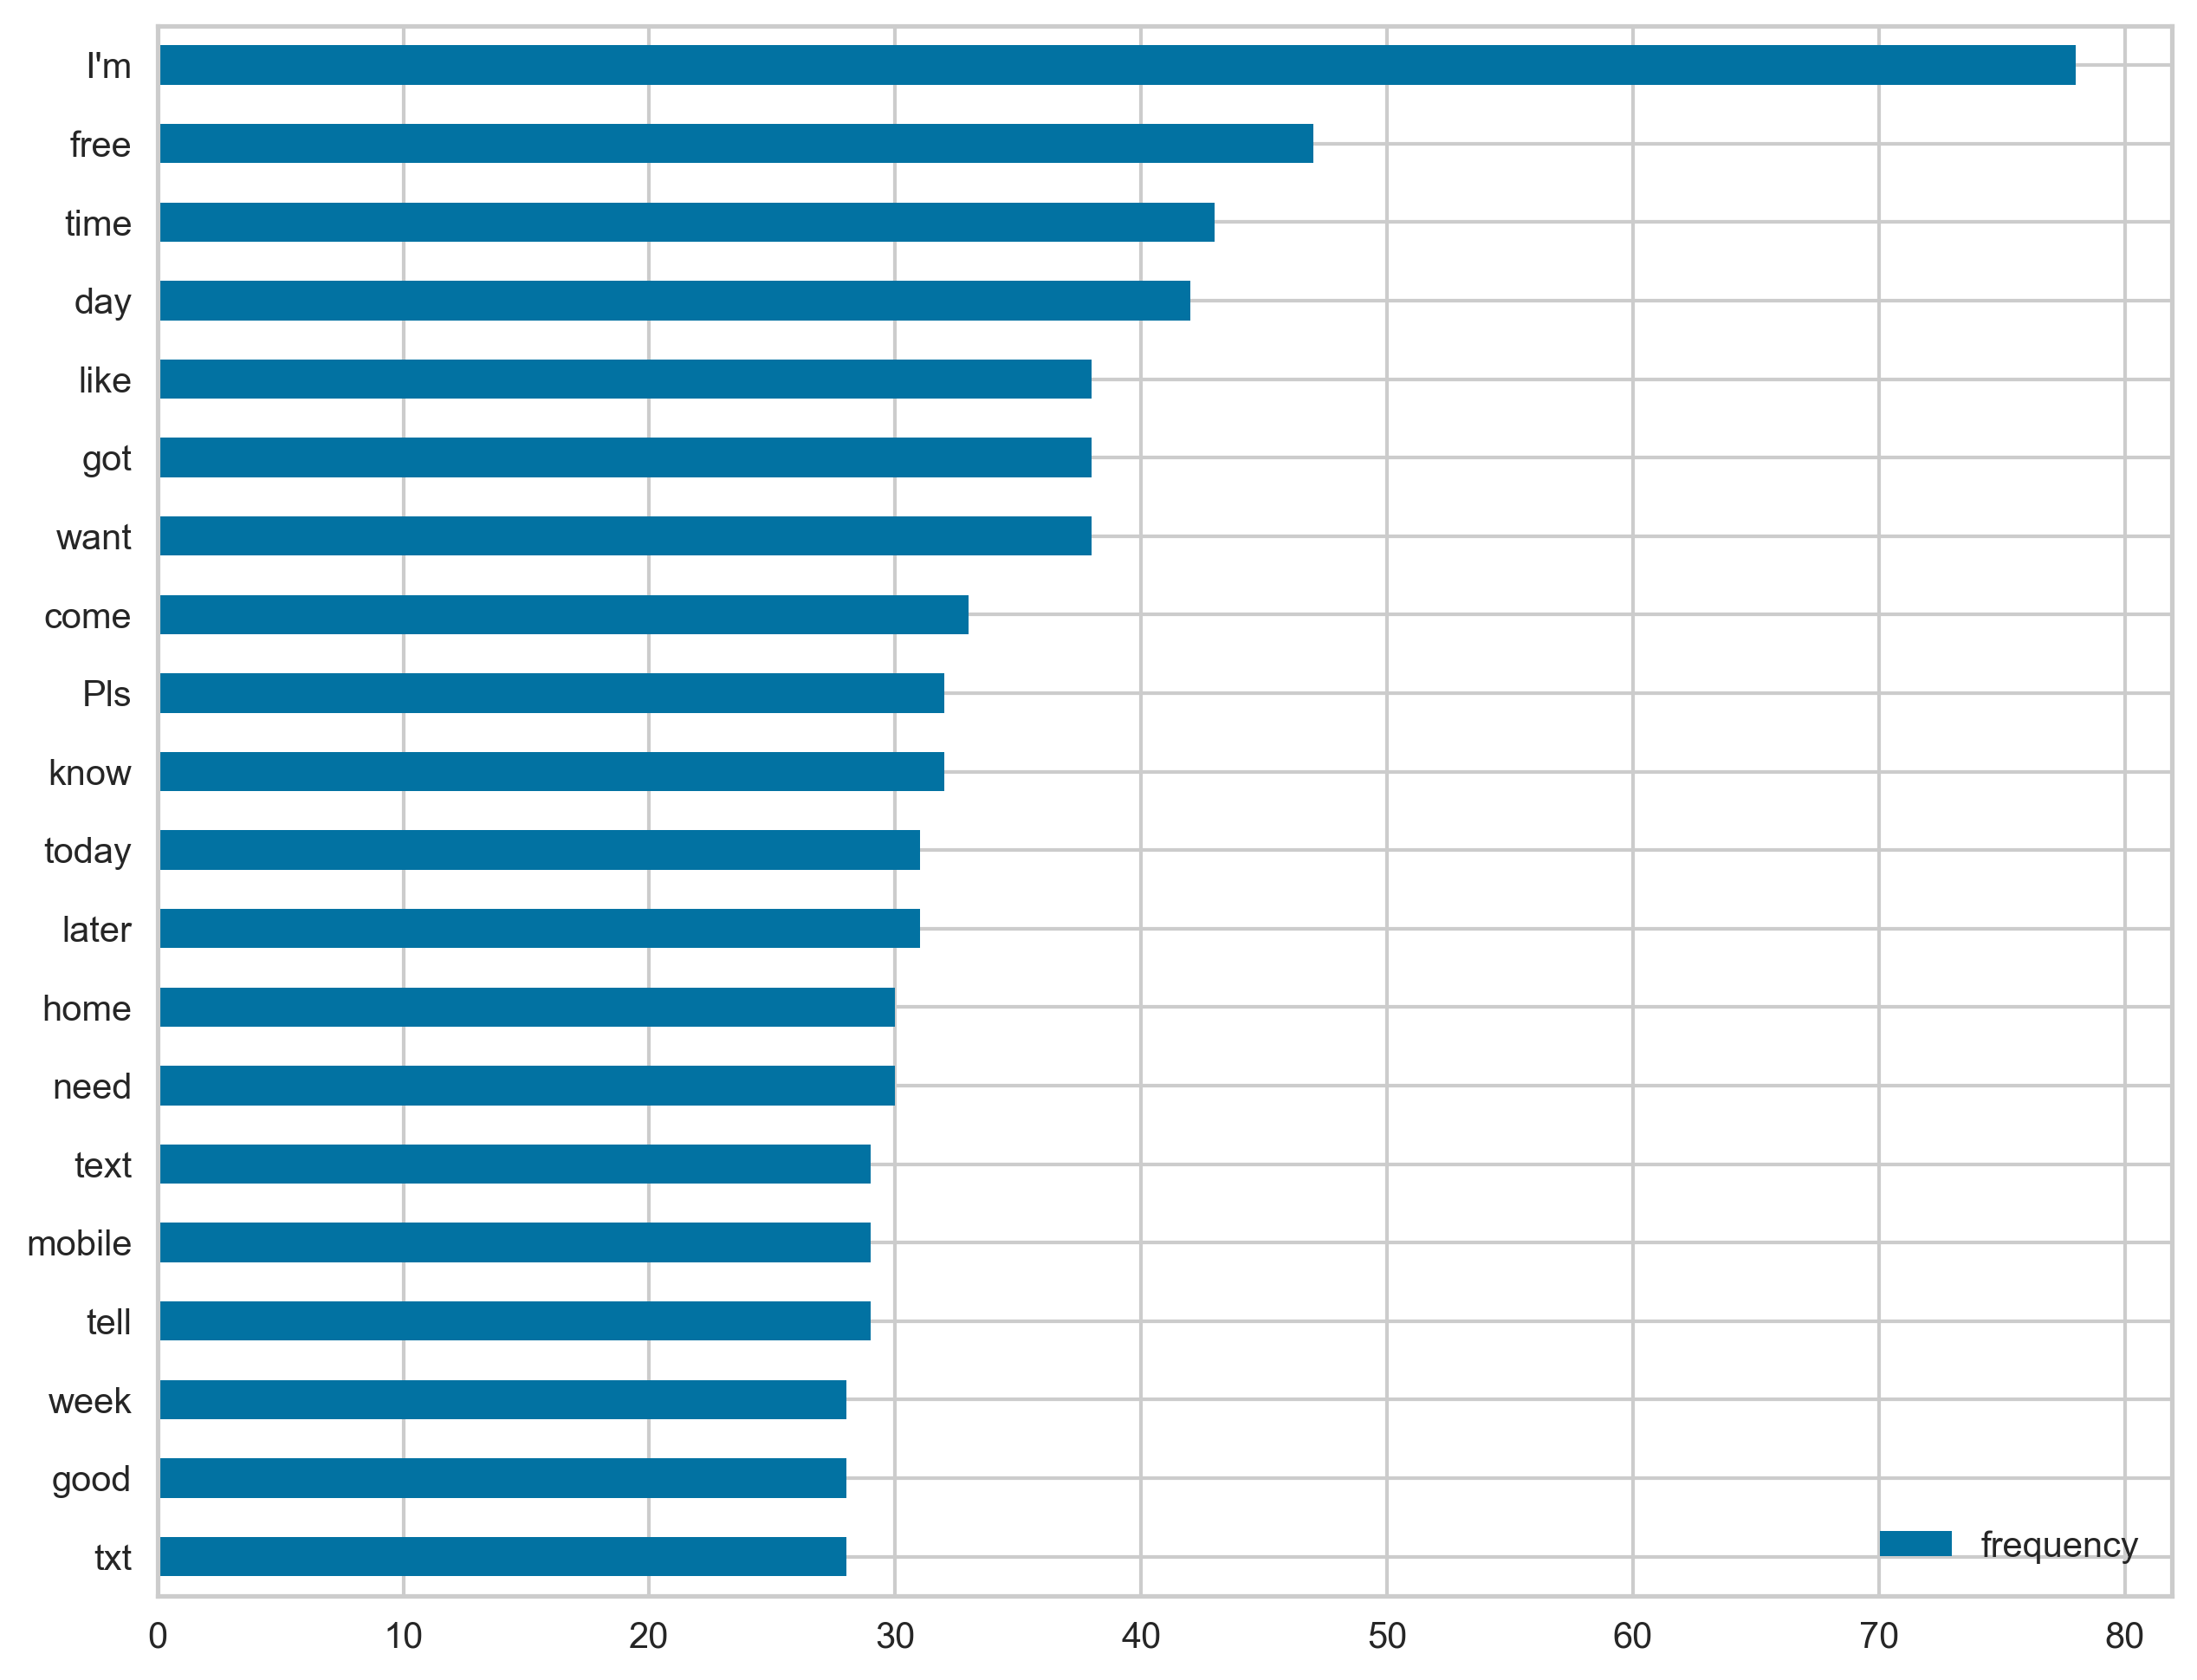

In [32]:
text = ' '.join(data['Message_body'].to_list())
freq = wc.process_text(text)
df_freq = pd.DataFrame.from_dict(freq, orient='index', columns=['frequency'])
df_freq = df_freq.sort_values('frequency')
df_freq[-20:].plot(kind = 'barh', figsize = (10,8))

plt.show()

In [33]:
!python -m spacy download en_core_web_sm

Python


In [35]:
nlp_ = nlp.setup(data = data, target='Message_body', session_id = 6842)
data_ = nlp.get_config('data_')
data_.head(10)

Description,Value
session_id,6842
Documents,957
Vocab Size,1550
Custom Stopwords,False


,S. No.,Message_body,Label
0,1,true name,Non-Spam
1,2,act interested buying else next week give free,Non-Spam
2,3,pity mood suggestion,Non-Spam
3,4,go esplanade home,Non-Spam
4,5,time try claim easy call minute national rate,Spam
5,6,get pound free call credit detail great offer ...,Spam
6,7,,Non-Spam
7,8,wait least,Non-Spam
8,9,,Non-Spam
9,10,say quite use considering,Non-Spam


In [37]:
cols = ['Topic_0', 'Topic_1', 'Topic_2', 'Label']

lda = nlp.create_model('lda', num_topics = 3)
data_assigned = nlp.assign_model(lda)
data_assigned_ = data_assigned[cols]

data_assigned_.head(10)    

,Topic_0,Topic_1,Topic_2,Label
0,0.733658,0.141611,0.124731,Non-Spam
1,0.161700,0.413030,0.425270,Non-Spam
2,0.105947,0.114817,0.779236,Non-Spam
3,0.102066,0.800481,0.097453,Non-Spam
4,0.790270,0.050459,0.159271,Spam
5,0.933895,0.034400,0.031705,Spam
6,0.329172,0.356726,0.314102,Non-Spam
7,0.383285,0.491797,0.124918,Non-Spam
8,0.329172,0.356726,0.314102,Non-Spam
9,0.610524,0.090477,0.298999,Non-Spam


In [38]:
nlp.plot_model(model = lda, plot = 'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.060695  0.192312       1        1  34.822716
0      0.207744 -0.070012       2        1  34.601785
2     -0.147050 -0.122300       3        1  30.575499, topic_info=          Term        Freq       Total Category  logprob  loglift
16        call  104.000000  104.000000  Default  30.0000  30.0000
14          go   73.000000   73.000000  Default  29.0000  29.0000
42        come   39.000000   39.000000  Default  28.0000  28.0000
191       send   31.000000   31.000000  Default  27.0000  27.0000
49       later   31.000000   31.000000  Default  26.0000  26.0000
22        time   27.000000   27.000000  Default  25.0000  25.0000
179       tell   27.000000   27.000000  Default  24.0000  24.0000
119       want   26.000000   26.000000  Default  23.0000  23.0000
39         say   22.000000   22.000000  Default  22.0000  22.0000
67        love   25.000000   25.000000  Default  21.0000  21.0000
319      today   24.000000   24.000000  Default  20.0000  20.0000
102     number   22.000000   22.000000  Default  19.0000  19.0000
6         give   22.000000   22.000000  Default  18.0000  18.0000
356      phone   21.000000   21.000000  Default  17.0000  17.0000
5         free   20.000000   20.000000  Default  16.0000  16.0000
103      still   18.000000   18.000000  Default  15.0000  15.0000
282     mobile   20.000000   20.000000  Default  14.0000  14.0000
316       work   20.000000   20.000000  Default  13.0000  13.0000
92       think   16.000000   16.000000  Default  12.0000  12.0000
9         week   16.000000   16.000000  Default  11.0000  11.0000
106       take   18.000000   18.000000  Default  10.0000  10.0000
15        home   17.000000   17.000000  Default   9.0000   9.0000
227      night   18.000000   18.000000  Default   8.0000   8.0000
110        ask   15.000000   15.000000  Default   7.0000   7.0000
33        text   17.000000   17.000000  Default   6.0000   6.0000
233       life   17.000000   17.000000  Default   5.0000   5.0000
77        keep   14.000000   14.000000  Default   4.0000   4.0000
32       reply   16.000000   16.000000  Default   3.0000   3.0000
463       many   16.000000   16.000000  Default   2.0000   2.0000
303       pick   16.000000   16.000000  Default   1.0000   1.0000
14          go   72.445751   73.010183   Topic1  -3.1726   1.0471
49       later   30.997819   31.575155   Topic1  -4.0216   1.0364
67        love   24.618137   25.189928   Topic1  -4.2520   1.0319
119       want   26.241409   26.860527   Topic1  -4.1881   1.0316
6         give   21.597967   22.148363   Topic1  -4.3829   1.0297
316       work   19.878636   20.467059   Topic1  -4.4658   1.0257
106       take   17.633633   18.167585   Topic1  -4.5857   1.0251
15        home   17.280687   17.809757   Topic1  -4.6059   1.0247
233       life   16.437046   17.027771   Topic1  -4.6559   1.0196
104       back   15.115931   15.677006   Topic1  -4.7397   1.0185
227      night   17.657073   18.346056   Topic1  -4.5843   1.0166
120      sleep   13.383564   13.906201   Topic1  -4.8614   1.0166
105      leave   13.012966   13.537262   Topic1  -4.8895   1.0154
270        let   13.342671   13.908549   Topic1  -4.8645   1.0134
463       many   16.145161   16.844245   Topic1  -4.6738   1.0125
223      first   12.342982   12.921906   Topic1  -4.9424   1.0091
274    tonight   10.814394   11.352045   Topic1  -5.0746   1.0064
62        much   13.642500   14.341375   Topic1  -4.8423   1.0049
71        soon    9.709916   10.248532   Topic1  -5.1823   1.0009
162     happen    9.632588   10.175538   Topic1  -5.1903   1.0001
200      happy    9.401524    9.935524   Topic1  -5.2146   0.9997
266      stuff    9.259868    9.797222   Topic1  -5.2298   0.9985
355       nite    8.567042    9.084899   Topic1  -5.3075   0.9962
159       talk    9.275363    9.839095   Topic1  -5.2281   0.9959
265        new    9.499492   10.089990   Topic1  -5.2042 

In [40]:
classf = classification.setup(data_assigned_, target = 'Label',
         fix_imbalance = True, train_size = 0.8, session_id = 3100, silent = True)

,Description,Value
0,session_id,3100
1,Target,Label
2,Target Type,Binary
3,Label Encoded,"Non-Spam: 0, Spam: 1"
4,Original Data,"(957, 4)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [41]:
xgboost = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.8478,0.7000,0.3889,0.5000,0.3998,0.4256
1,0.8701,0.9157,0.8000,0.5000,0.6154,0.5422,0.5639
2,0.9221,0.8418,0.7000,0.7000,0.7000,0.6552,0.6552
3,0.8312,0.8612,0.7000,0.4118,0.5185,0.4244,0.4464
4,0.8442,0.9224,0.8000,0.4444,0.5714,0.4855,0.5169
5,0.8947,0.9453,0.6667,0.5455,0.6000,0.5401,0.5437
6,0.8816,0.8814,0.5556,0.5000,0.5263,0.4589,0.4597
7,0.9211,0.9818,0.8889,0.6154,0.7273,0.6829,0.6987
8,0.8553,0.8477,0.7000,0.4667,0.5600,0.4775,0.4916
9,0.8684,0.8379,0.6000,0.5000,0.5455,0.4693,0.4719


In [42]:
xgboost_final = classification.finalize_model(xgboost)

nlp.save_model(lda, 'lda_model')
classification.save_model(xgboost_final, 'xgboost_model')

Model Succesfully Saved
Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Label',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                                learning_rate=0.300000012, max_delta_step=0,
                                max_depth=6, min_child_weight=1, missing=nan,
                                monotone_constraints='()', n_estimators=100,
                                n_jobs=-1,